# Resumo do projeto:

Projeto visa criar um modelo de Machine Learning de classificação.<br> 
Desafio proposto pelo hospital Sírio Libanês (Desafio Postado no Kaggle) com o intuito de verificar se o paciente terá a necessidade de leitos de UTI ou não para casos de COVID-19.<br>

Dados adquiridos atraves do seguinte link: https://www.kaggle.com/S%C3%ADrio-Libanes/covid19

## Etapas a serem seguidas:
1 - Aquisição e leitura dos dados.<br>
1.1 - Tratativas nos dados (Correções gerais nos dados, preenchimentos e alterações).<br>
2 - Selecionar modelos de machine learning a serem testados.<br>
2.1 - Selecionar os modelos com melhor precisão<br>
3 - Selecionar as métricas de validação.<br>
3.1 - Realizar os testes de validação necessários.<br>
4 - Exportar Modelo.<br>

## Bibliotecas utilizadas (Tratamento dos dados)
Pandas<br>
numpy<br>
RepeatedStratifiedKFold

## Modelos de classificação
KNeighborsClassifier<br>
SVC<br>
NuSVC<br>
DecisionTreeClassifier<br>
RandomForestClassifier<br>
AdaBoostClassifier<br>
GradientBoostingClassifier<br>
GaussianNB<br>
LinearDiscriminantAnalysis<br>
QuadraticDiscriminantAnalysis

## Métricas para validação

plot_confusion_matrix<br>
classification_report<br>
cross_validate<br>
log_loss<br>

## Visualização
Matplotlib<br>
Seaborn

# 1 - Aquisição e leitura dos dados

Os dados utilizados foram adquiridos através do kaggle, então abaixo iremos realizar a leitura dos mesmos, para isso iremos utilizar a biblioteca pandas.

In [44]:
import pandas as pd
import numpy as np

In [45]:
dados = pd.read_excel('..\Dados\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


# 1.1 - Tratativa nos dados

Primeiro iremos criar uma função para nos retornar as colunas que iremos retornar corretamente, pois muitos de nossos dados possuem valores não numéricos (NaN), então iremos preencher estes valores. A forma utilizada será replicar valores anteriores para as devidas linha que estiverem sem seus valores.<br>
A idéia é replicar o seu primeiro encontrado valor para todas as linhas nas quais estejam com NaN, em caso de outro valor, seguir replicando ele (tanto para frente, quanto para tras)

In [46]:
def preenche_tabela(dados):
    # Linha utilizada para selecionar as colunas (coluna 13 até a penultima coluna)
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    # Realizado um agrupamento pelo identificador do paciente e selecionado o valor de 'features_continuas_colunas'
    # Após isso realizar as funções de fillna com os metodos de preencher para tras e preencher para frente.
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index = False)[features_continuas_colunas].fillna(method = 'bfill').fillna(method = 'ffill')
    # Aqui foi realizada uma seleção das nossas variáveis categoricas.
    features_categoricas = dados.iloc[:, :13]
    # Esta variável saída foi escolhida para adicionar as duas ultimas colunas no nosso df.
    saida = dados.iloc[:, -2:]
    
    # Abaixo realizamos a concatenação de todas as alterações que fizemos, para nos retornar um novo Data Frame
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index = True, axis = 1)
    dados_finais.columns = dados.columns
    return dados_finais

In [47]:
dados_preenchidos = preenche_tabela(dados)
dados_preenchidos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


Verificando nossas variáveis categoricas(que podem ser encontradas da primeira coluna até a coluna 13), percebemos que quase todas as variáveis são numéricas, com exceção da coluna 'AGE_PERCENTIL', então o que iremos fazer é transforma-la em numérica.

In [48]:
dados_preenchidos['AGE_PERCENTIL'] = dados_preenchidos['AGE_PERCENTIL'].astype('category').cat.codes
dados_preenchidos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Nossa intenção é prever se um dado paciente irá necessitar de UTI ou não logo na primeira janela de tempo em que entrou no hospital, então para isso iremos seguir a seguinte lógica: Se o paciente obteve em alguma janela (com exceção da primeira janela) o valor 1 (Verdadeiro para UTI) iremos transferir o valor de UTI para sua primeira janela, então iremos fazer duas coisas:<br>
1: Remover os pacientes que atualmente possuem valor 1 na coluna de UTI (ICU)<br>
2: Transferir os valores de internação positiva para sua primeira janela.<br>

In [49]:
# Seleção realizada para verificar os dados que iremos remover
remocao = dados_preenchidos.query('WINDOW == "0-2" and ICU ==1')['PATIENT_VISIT_IDENTIFIER'].values

In [50]:
dados_preenchidos = dados_preenchidos.query('PATIENT_VISIT_IDENTIFIER not in @remocao')
dados_preenchidos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Parte da remoção está completa, agora iremos preparar as janelas, transferindo os valores 1 para sua primeira janela caso estejam presentes.<br>
Para isso iremos criar uma função que vai realizar esta ação, isso também irá ajudar a encurtar nossas amostras, pois percebemos que os pacientes se repetem diversas vezes, queremos apenas 1 linha por paciente

In [51]:
def atualizar_janelas(rows):
    # Parte realizada para selecionar se existe algum valor verdadeiro ICU nas colunas
    if (np.any(rows['ICU'])):
        # Feito um slice com uma condição booleana, podemos ler da seguinte forma:
        # Se o ICU tiver valor 1, adicione o valor 1 na janela 0-2
        rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
    return rows.loc[rows['WINDOW'] == '0-2']

In [52]:
# Agora iremos aplicar a função.
dados_preenchidos = dados_preenchidos.groupby('PATIENT_VISIT_IDENTIFIER').apply(atualizar_janelas)
# Iremos tambem, resetar o Indice
dados_preenchidos.reset_index(drop=True, inplace = True)

In [53]:
# E para garantir a anonimidade do paciente, vamos dropar seu identificador
dados_preenchidos.drop('PATIENT_VISIT_IDENTIFIER' ,axis = 1, inplace = True)

Como ultimo toque, vamos dropar os valores NaN para deixar os dados perfeitos

In [54]:
dados_preenchidos.dropna(inplace = True)

Nossos dados estão da forma que queremos, agora iremos seguir para aplicação dos modelos selecionados. <br>
Nesta primeira instancia, o caminho que irei seguir é o seguinte: Testar todos os modelos selecionados, e selecionar 3 com as maiores precisoes. Após isso seguir com os outros testes para verificar o com o melhor recall

# 2 - Selecionar os modelos a serem testados

Iremos testar os seguintes modelos:<br>
KNeighborsClassifier<br>
SVC<br>
NuSVC<br>
DecisionTreeClassifier<br>
RandomForestClassifier<br>
AdaBoostClassifier<br>
GradientBoostingClassifier<br>
GaussianNB<br>
LinearDiscriminantAnalysis<br>
QuadraticDiscriminantAnalysis<br>

Antes de iniciarmos a instanciar os modelos, iremos estratificar os dados.

In [55]:
x = dados_preenchidos.iloc[:, :-2]
x = x.reset_index(drop = True)

In [56]:
y = dados_preenchidos['ICU']
y = y.reset_index(drop=True)

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold()
cv.get_n_splits(x,y)

50

In [58]:
for train_index, test_index in cv.split(x, y):
    X_train, X_test = x.T[train_index], x.T[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [59]:
X_train, X_test = X_train.T, X_test.T

# 2.1 - Selecionar os modelos com melhor precisão

Com nossos dados de treino e teste separados, iremos instanciar os devidos modelos.<br>
A lógica que irá determinar quais irão para a proxima etapa, será os modelos com acurácia acima de 70

In [60]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Iremos fazer um 'for' para verificar a precisão/acurácia de cada modelo, e então adicionar os devidos resultados em um DF para podermos fazer uma comparação

In [61]:
# Variável criada para colocar todos os classificadores em uma lista
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Variaveis criadas para criar um DF com apenas as 3 colunas descritas
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [62]:
for clf in classifiers:
    # Responsável por utilizar o classificador e fazer o fit com os dados de treino
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    # Parte abaixo utilizada para verificar a acurácia dos dados
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    # Usada para verificar a perda de logs
    train_predictions = clf.predict_proba(X_test)
    # Função Log_loss responsável por nos devolver as probabilidades (negativas) da predicção dos nossos modelos.
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    # Append em nossa variável anterior
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

KNeighborsClassifier
****Results****
Accuracy: 60.0000%
Log Loss: 3.91089321721121
SVC
****Results****
Accuracy: 54.2857%
Log Loss: 0.6617453045560018
NuSVC
****Results****
Accuracy: 70.0000%
Log Loss: 0.5782694334191828
DecisionTreeClassifier
****Results****
Accuracy: 67.1429%
Log Loss: 11.348455101184939
RandomForestClassifier
****Results****
Accuracy: 74.2857%
Log Loss: 0.608737464592135
AdaBoostClassifier
****Results****
Accuracy: 64.2857%
Log Loss: 0.6710636788550964
GradientBoostingClassifier
****Results****
Accuracy: 71.4286%
Log Loss: 0.6977973478289708
GaussianNB
****Results****
Accuracy: 50.0000%
Log Loss: 16.47463639111725
LinearDiscriminantAnalysis
****Results****
Accuracy: 67.1429%
Log Loss: 1.070311439789878
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 52.8571%
Log Loss: 16.282566014743608


C:\Users\Kaiqu\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Acima obtivemos os dados numéricos dos testes realizados pelos modelos, abaixo iremos criar uma vizualização dos resultados

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style('darkgrid')
sns.set_palette('Accent')

In [64]:
log = log.sort_values(by = 'Accuracy', ascending = False)

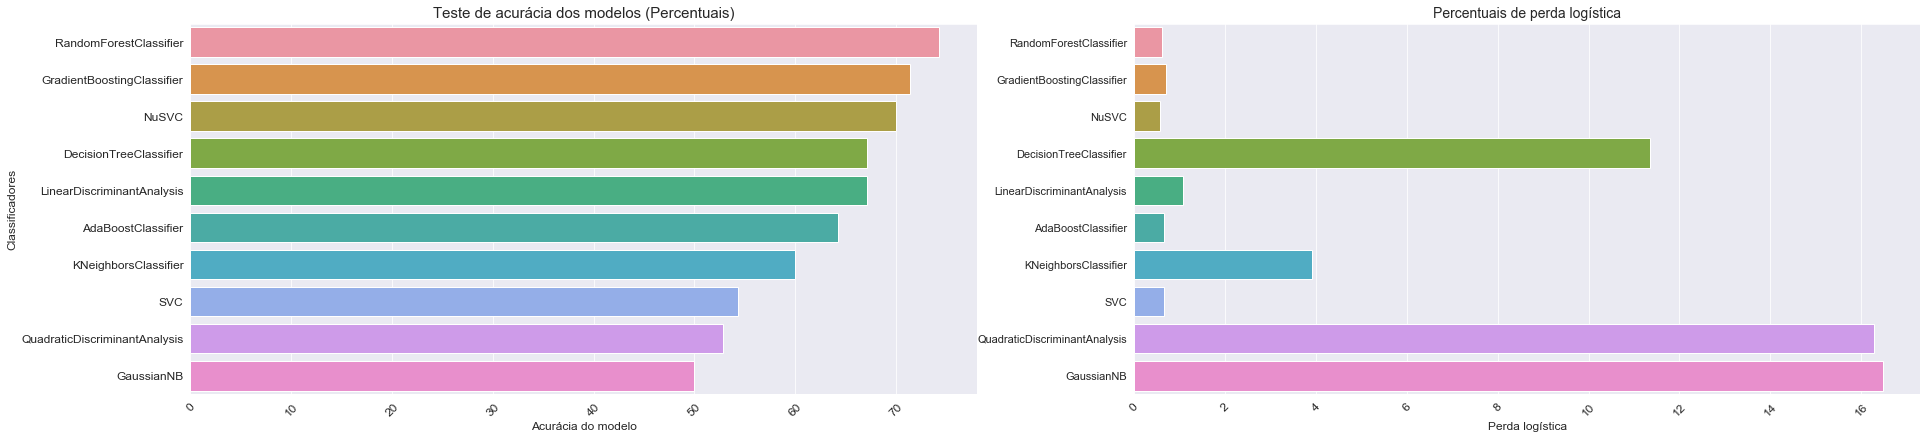

In [111]:
ax = plt.figure(1, figsize=(31,15))
ax = plt.subplot(221)
ax = sns.barplot(data = log, x = 'Accuracy', y = 'Classifier')
ax.set_ylabel('Classificadores', fontsize=12)
ax.set_xlabel('Acurácia do modelo', fontsize=12)
ax.set_title('Teste de acurácia dos modelos (Percentuais)',fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

ax2 = plt.subplot(222)
ax2 = sns.barplot(data = log, x = 'Log Loss', y = 'Classifier')
ax2.set_ylabel('')
ax2.set_xlabel('Perda logística', fontsize=12)
ax2.set_title('Percentuais de perda logística', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=11);

Com o teste de precisão realizado acima, os modelos selecionados para os testes futuro serão: GradientBoostingClassifier, NuSVC e RandomForestClassifier.

# 3 - Selecionar Métricas de validação

Nesta etapa iremos selecionar as devidas métricas de validação que escolhemos para nossos modelos.<br>
Como estamos lidando com um classificador binário, uma ótima métrica que iremos utilizar é a curva ROC-AUC, a mesma serve para ilustrar o desempenho de nosso modelo.<br>

Outro método que iremos utilizar é a matriz de confusão, pois nosso foco é bem voltado para o Recall, então queremos ver as quantias de falsos positivos / negativos etc...<br>

Com o classification_report iremos verificar os resultados numéricos dos nossos modelos, retornando acurácia, recall e f1-score.<br>
Abaixo seguiremos com as devidas importações

In [66]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# 3.1 - Realização dos testes para validação

In [67]:
# Definição dos modelos que iremos treinar.
gradient = GradientBoostingClassifier()
nusvc = NuSVC()
random_forest = RandomForestClassifier()

Iremos também instanciar parametros a serem utilizados para testar nossos modelos. Será criada uma variável para cada modelo a ser testado

In [68]:
parametros_gradient = {'loss':['deviance', 'exponential'],
                      'criterion':['friedman_mse','mse'],
                      'n_estimators': randint(1, 350),
                      'max_depth': randint(1, 6),
                      'min_samples_split' : randint(1, 150),
                      'min_samples_leaf' : randint(1, 150)}

In [69]:
parametros_nusvc = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                   'gamma':['scale','auto'],
                   'decision_function_shape':['ovo','ovr']}

In [70]:
parametros_random_forest = {'n_estimators':randint(1, 350),
                           'criterion':["gini", "entropy"],
                           'max_depth' : randint(1, 6),
                           'min_samples_split' : randint(1, 150),
                           'min_samples_leaf' : randint(1, 150),
                           'bootstrap':[True, False]}

Com nossos modelos instanciados(porém sem Hyperparametros definidos) iremos definir uma função para verificar a capacidade de generalização dos nossos modelos e nos devolver os melhores parametros encontrados.<br>

In [71]:
def teste_modelo(modelo, dados, n_separacoes, n_repeticoes, parametros, n_iteracoes):
    
    np.random.seed(654456)
    # Passo abaixo realizado para iniciar a aleatoriedade dos nossos dados, então iremos adquirir uma amostra aleatoria
    dados = dados.sample(frac = 1).reset_index(drop=True)
    x_colunas = dados.columns
    y = dados['ICU']
    x = dados.iloc[:, :-2]
    
    # Parte abaixo realizada para trabalhar ainda mais a randomização do nosso modelo, isso irá fazer com que os dados sejam ainda mais embaralhados
    validacao_cruzada = RepeatedStratifiedKFold(n_splits = n_separacoes, n_repeats = n_repeticoes)
    
    busca = RandomizedSearchCV(modelo, param_distributions=parametros, 
                               n_iter = n_iteracoes, 
                               cv = validacao_cruzada, 
                               scoring = 'roc_auc', 
                               return_train_score = True)
    
    busca.fit(x, y)
    # Com este comando abaixo iremos retornar os resultados em um DataFrame, para que possamos coletar posteriormente os resultados do intervalo AUC
    resultados = pd.DataFrame(busca.cv_results_)
    
    # Variaveis abaixo utilizadas para adquirir AUC geral e AUC de treino
    auc_medio = resultados.iloc[busca.best_index_]['mean_test_score']
    auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']
    
    # variavel criada para selecionar o desvio padrao dos nossos dados, assim iremos realizar um calculo para adquirir o intervalo inferior e superior
    auc_std = resultados.iloc[busca.best_index_]['std_test_score']

    intervalo_inf = auc_medio - 2 * auc_std
    intervalo_sup = auc_medio + 2 * auc_std
    
    print('AUC: {}, Intervalos: {} - {}'.format(auc_medio, intervalo_inf, intervalo_sup))
    return busca.best_params_

In [72]:
teste_modelo(gradient, dados_preenchidos, 5, 10, parametros_gradient, 5)

AUC: 0.7874563289365922, Intervalos: 0.7141543188125529 - 0.8607583390606316


{'criterion': 'mse',
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_leaf': 66,
 'min_samples_split': 51,
 'n_estimators': 213}

In [73]:
teste_modelo(nusvc, dados_preenchidos, 5, 10, parametros_nusvc, 5)

AUC: 0.7678762823828613, Intervalos: 0.664318937469831 - 0.8714336272958917


{'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovr'}

In [74]:
teste_modelo(random_forest, dados_preenchidos, 5, 10, parametros_random_forest, 5)

AUC: 0.7862144785335574, Intervalos: 0.681688663970063 - 0.8907402930970518


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 30,
 'n_estimators': 209}

Conseguimos alguns parametros otimizados, entao iremos instanciar novamente os modelos porém com estes dados parametros agora.

In [99]:
gradient = GradientBoostingClassifier(criterion = 'mse', loss = 'deviance', max_depth= 3, min_samples_leaf= 66, min_samples_split= 51,n_estimators= 213)
nusvc = NuSVC(kernel= 'rbf', gamma= 'scale', decision_function_shape= 'ovr', probability = True)
random_forest = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 2, min_samples_leaf= 8, min_samples_split= 30, n_estimators= 209)

Com nossos modelos e seus devidos parâmetros, iremos verificar o classification report, para que possamos ver suas outras métricas

In [100]:
# realizando o fit dos nossos dados de treino em nossos modelos
gradient.fit(X_train, y_train)
nusvc.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=209,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
# variaveis criadas para salvar o predict de cada modelo criado
predict_gradient = gradient.predict(X_test)
predict_nusvc = nusvc.predict(X_test)
predict_random_forest = random_forest.predict(X_test)

In [102]:
# bibliotecas importadas para verificar os score's gerais
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

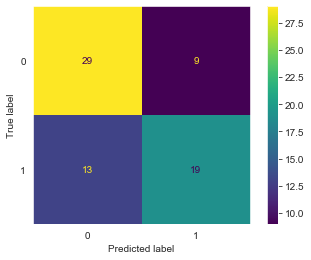

In [130]:
plot_confusion_matrix(gradient, X_test, y_test)
plt.grid(False)

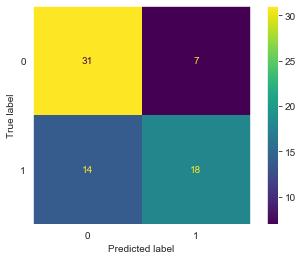

In [131]:
plot_confusion_matrix(nusvc, X_test, y_test)
plt.grid(False)

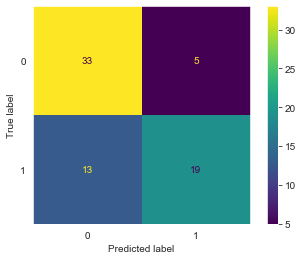

In [132]:
plot_confusion_matrix(random_forest, X_test, y_test)
plt.grid(False)

A intenção das matrizes de confusão, é para que verifiquemos os valores TN, onde o nosso modelo previu, algo que não estavamos buscando, com um valor correto.<br>
No nosso caso, como exemplo, podemos dizer o seguinte: O paciente analisado iria receber alta, mas nosso modelo disse que ele iria precisar de um leito e no fim das contas, ele precisou.<br>

Abaixo iremos verificar os dados de uma forma "geral" com o classification report e o valor AUC

In [103]:
print("AUC: {}".format(roc_auc_score(y_test, gradient.predict_proba(X_test)[:, 1])))
print(classification_report(y_test, predict_gradient))

AUC: 0.7351973684210527
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.68      0.59      0.63        32

    accuracy                           0.69        70
   macro avg       0.68      0.68      0.68        70
weighted avg       0.69      0.69      0.68        70



In [104]:
print("AUC: {}".format(roc_auc_score(y_test, nusvc.predict_proba(X_test)[:, 1])))
print(classification_report(y_test, predict_nusvc))

AUC: 0.7639802631578947
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.72      0.56      0.63        32

    accuracy                           0.70        70
   macro avg       0.70      0.69      0.69        70
weighted avg       0.70      0.70      0.69        70



In [105]:
print("AUC: {}".format(roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])))
print(classification_report(y_test, predict_random_forest))

AUC: 0.7828947368421053
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        38
           1       0.79      0.59      0.68        32

    accuracy                           0.74        70
   macro avg       0.75      0.73      0.73        70
weighted avg       0.75      0.74      0.74        70



# 4 - Conclusão e exportação do modelo

Com o valor AUC de cada testes, em disparado o random_forest foi o que se melhor se destacou, com recall ótimo e também uma ótima precisão.<br>
Então, como fatores dominantes que utilizei para este projeto, com base nas métricas de Recall e AUC, o modelo escolhido para realizar as previsoes sobre a necessidade de leito(ou não) ficará com o modelo random_forest. Abaixo iremos exportar o modelo:

In [134]:
from joblib import dump, load
dump(random_forest, 'random_forest_sirio_libanes.joblib')

['random_forest_sirio_libanes.joblib']

Caso queiramos utilizar o modelo em outro notebook, basta apenas realizar o seguinte comando:<br>

modelo_random_forest = load('random_forest_sirio_libanes.joblib')<br>
devemos apenas, caso necessário, antes do nome do arquivo, adicionar o caminho no qual está salvo!

In [135]:
# teste para verificar se o modelo exportado esta funcionando corretamente
modelo_random_forest = load('random_forest_sirio_libanes.joblib')

In [136]:
modelo_random_forest.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)